<a href="https://colab.research.google.com/github/baut-jc/ddds-c18/blob/lectures/Lectures/5-5e_DBSCAN_Clustering_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN

## Imports

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs


## Blob Example

''

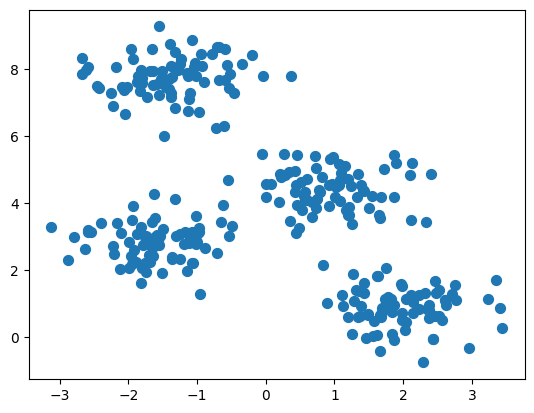

In [2]:
X, y_true = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=0.60,
    random_state=0,
)
plt.scatter(X[:, 0], X[:, 1], s=50)
;


### K-Means

In [3]:
kmeans = KMeans(n_clusters=4, n_init=10).fit(X)


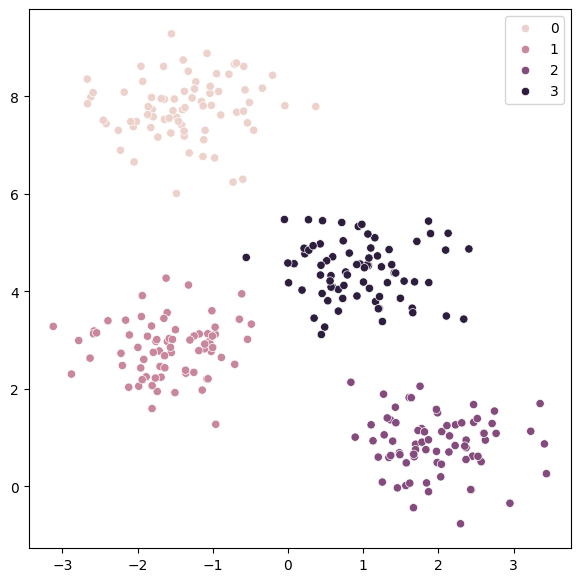

In [4]:
plt.figure(figsize = (7,7))
sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmeans.labels_) ;


### DBSCAN

In [5]:
dbscan=DBSCAN(eps=.8,min_samples=9)
dbscan.fit(X)
;

''

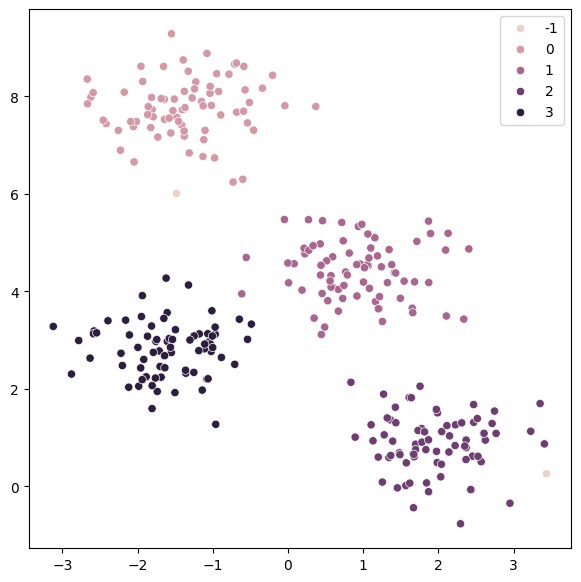

In [6]:
plt.figure(figsize = (7,7))
sns.scatterplot(x = X[:,0], y = X[:,1], hue=dbscan.labels_) ;


In [7]:
dbscan.labels_

array([ 2,  0,  1,  0,  2, -1,  3,  1,  0,  0,  3,  0,  1,  0,  2,  1,  1,
        2,  3,  3,  2,  2,  1,  3,  3,  1,  2,  1,  3,  1,  0,  0,  1,  0,
        0,  0,  0,  0,  3,  2,  1,  3,  1,  1,  3,  3,  0,  3,  0,  2,  3,
        2,  0,  2,  2,  3,  0,  3,  0,  2,  0,  1,  0,  3,  3,  3,  0,  2,
        0,  3,  1,  3,  0,  3,  3,  0,  3,  1,  2,  0,  2,  1,  2,  2,  0,
        1,  2,  1,  0,  0,  1,  2,  0,  3,  3,  1,  2,  2,  1,  3,  0,  2,
        0,  2,  1,  2,  2,  1,  0,  1,  3,  3,  2,  0,  2,  1,  0,  2,  2,
        1,  3,  2,  3,  2,  2,  2,  2,  3,  2,  3,  0,  3,  3,  2,  0,  3,
        3,  0,  1,  0,  0,  3,  1,  3,  1,  3,  0,  1,  0,  0,  0,  1,  0,
        1,  2,  3,  0,  3,  2,  1,  0,  1,  1,  2,  1,  3,  3,  1,  2,  1,
        1,  0,  2,  1,  3,  0,  2,  2,  1,  3,  2,  1,  3,  3,  1,  1,  1,
        1,  2,  0,  1,  3,  1,  1,  3,  3,  3,  1,  3,  0,  1,  3,  2,  3,
        1, -1,  3,  0,  1,  0,  1,  3,  1,  1,  0,  3,  3,  2,  2,  1,  0,
        2,  2,  3,  2,  3

In [8]:
dict(zip(*np.unique(dbscan.labels_, return_counts=True)))

{np.int64(-1): np.int64(2),
 np.int64(0): np.int64(74),
 np.int64(1): np.int64(76),
 np.int64(2): np.int64(74),
 np.int64(3): np.int64(74)}

## Non-Blob Example

### Create Random Data

In [10]:
np.random.seed(100)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    '''This does math stuff'''
    return [ (math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),
              math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30))
                for x in range(1,n+1)
           ]


In [11]:
# Creating data points in the form of a circle
dfs = [ pd.DataFrame(PointsInCircum(500,1000)) ]
dfs[0].shape

(1000, 2)

In [12]:
# Add another circle inside
dfs += [ pd.DataFrame( PointsInCircum(300,700) ) ]
dfs[1].shape

(700, 2)

In [13]:
# Adding noise to the dataset
dfs += [ pd.DataFrame( ( np.random.randint(-600,600), np.random.randint(-600,600) ) for i in range(300) ) ]
dfs[2].shape

(300, 2)

In [14]:
# Combine data sets
df = pd.concat( dfs )
df.shape

(2000, 2)

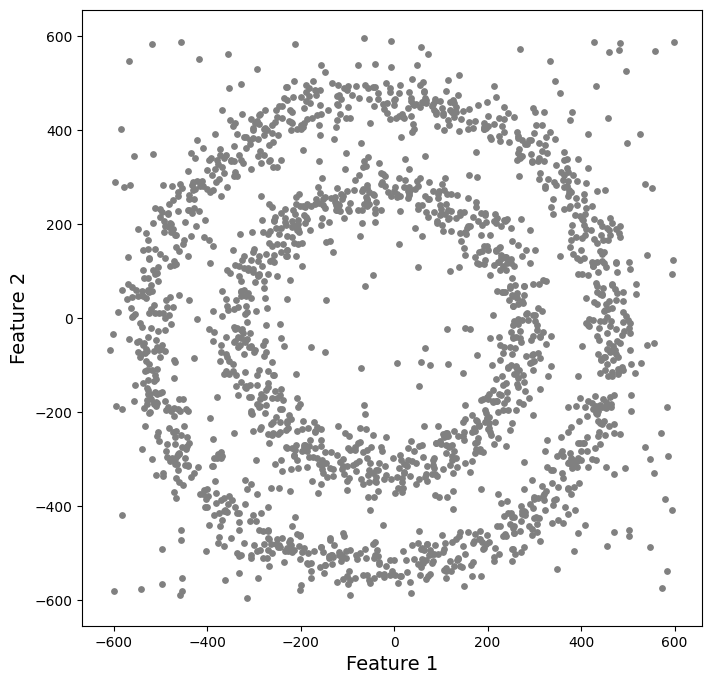

In [15]:
# Plotting data
plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show() ;


### K-means

In [16]:
kmeans=KMeans(n_clusters=2, random_state=42, n_init=10).fit(df)


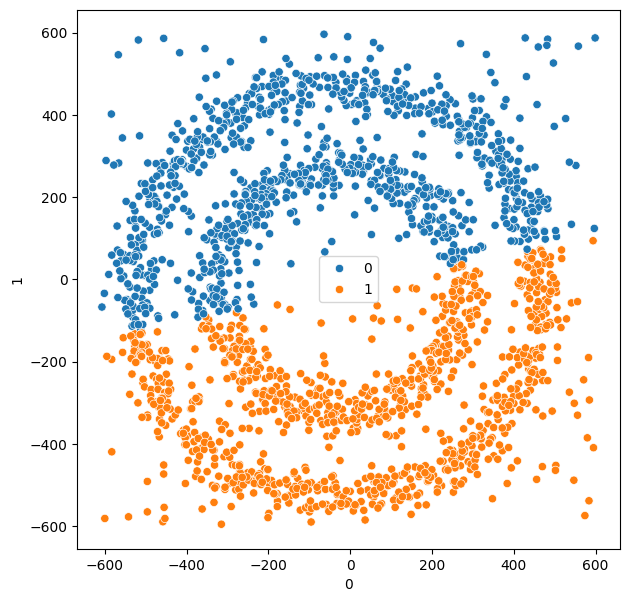

In [17]:
plt.figure(figsize = (7,7))
sns.scatterplot(x = df[0], y = df[1], hue=kmeans.labels_) ;


### DBSCAN

In [ ]:
dbscan=DBSCAN(eps=40, min_samples=7)
dbscan.fit(df) ;


In [ ]:
plt.figure(figsize = (7,7))
sns.scatterplot(x = df[0], y = df[1], hue=dbscan.labels_) ;
